In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('DesignuebungGradingData.csv')

In [2]:
print(data.info())
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time to complete exam  386 non-null    int64  
 1   Year                   386 non-null    int64  
 2   Nachklausur            386 non-null    object 
 3   Grade                  386 non-null    float64
 4   Course                 386 non-null    object 
 5   Attemptnumber          386 non-null    int64  
 6   Bachelor/Master        386 non-null    object 
 7   Study                  386 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 24.3+ KB
None
       Time to complete exam         Year       Grade  Attemptnumber
count             386.000000   386.000000  386.000000     386.000000
mean               61.259067  2022.041451    3.124611       1.251295
std                16.916149     0.941589    1.249682       0.545642
min                15.000000  20

,Time to complete exam,Year,Nachklausur,Grade,Course,Attemptnumber,Bachelor/Master,Study
0,24,2022,No,5.0,Vis,1,WirtschaftsInformatik,Master
1,67,2022,No,2.0,Vis,1,WirtschaftsInformatik,Bachelor
2,68,2022,No,4.0,Vis,2,WirtschaftsInformatik,Master
3,52,2022,No,3.7,Vis,1,(Wirtschafts-)Mathematik,Master
4,74,2022,No,2.3,Vis,2,(Wirtschafts-)Mathematik,Master


In [3]:
print(data['Nachklausur'].nunique())
print(data['Bachelor/Master'].nunique())
print(data['Course'].nunique())
print(data['Study'].nunique())
print()
print(data['Nachklausur'].value_counts())
print()
print(data['Bachelor/Master'].value_counts())
print()
print(data['Course'].value_counts())
print()
print(data['Study'].value_counts())

4
2
3
2

No     250
Yes     90
yes     25
no      21
Name: Nachklausur, dtype: int64

WirtschaftsInformatik       264
(Wirtschafts-)Mathematik    122
Name: Bachelor/Master, dtype: int64

Vis    274
VA      82
Va      30
Name: Course, dtype: int64

Master      252
Bachelor    134
Name: Study, dtype: int64


In [4]:
data['Nachklausur'] = data['Nachklausur'].str.lower()
data['Course'] = data['Course'].str.lower()
print(data['Nachklausur'].nunique())
print(data['Course'].nunique())

2
2


In [6]:
def categorize_time(time):
    if time <= 30:
        return '0-30'
    elif time <= 60:
        return '31-60'
    elif time <= 90:
        return '61-90'
data['Time Category'] = data['Time to complete exam'].apply(categorize_time)
data['Exam Result'] = data['Grade'].apply(lambda x: 'Passed' if x != 5 else 'Failed')
data['Result Numeric'] = data['Exam Result'].apply(lambda x: 1 if x == 'Passed' else 0)
data.info()
print()
print(data['Time to complete exam'].value_counts())
print()
print(data['Year'].value_counts())
print()
print(data['Grade'].value_counts())
print()
print(data['Attemptnumber'].value_counts())
print()
print(data['Result Numeric'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time to complete exam  386 non-null    int64  
 1   Year                   386 non-null    int64  
 2   Nachklausur            386 non-null    object 
 3   Grade                  386 non-null    float64
 4   Course                 386 non-null    object 
 5   Attemptnumber          386 non-null    int64  
 6   Bachelor/Master        386 non-null    object 
 7   Study                  386 non-null    object 
 8   Time Category          386 non-null    object 
 9   Exam Result            386 non-null    object 
 10  Result Numeric         386 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 33.3+ KB

68    20
74    19
63    18
73    17
71    16
69    16
65    16
79    15
15    15
82    12
52    12
78    11
64    11
72    10
75    10
46    10
48     9
77

In [8]:
# Korrelationsmatrix erstellen
correlation = data[['Time to complete exam', 'Year', 'Grade', 'Attemptnumber', 'Result Numeric']].corr()
round(correlation,4)

,Time to complete exam,Year,Grade,Attemptnumber,Result Numeric
Time to complete exam,1.0000,0.0155,-0.1364,-0.0532,0.2176
Year,0.0155,1.0000,0.1172,0.0403,-0.0062
Grade,-0.1364,0.1172,1.0000,-0.0502,-0.7379
Attemptnumber,-0.0532,0.0403,-0.0502,1.0000,0.0462
Result Numeric,0.2176,-0.0062,-0.7379,0.0462,1.0000


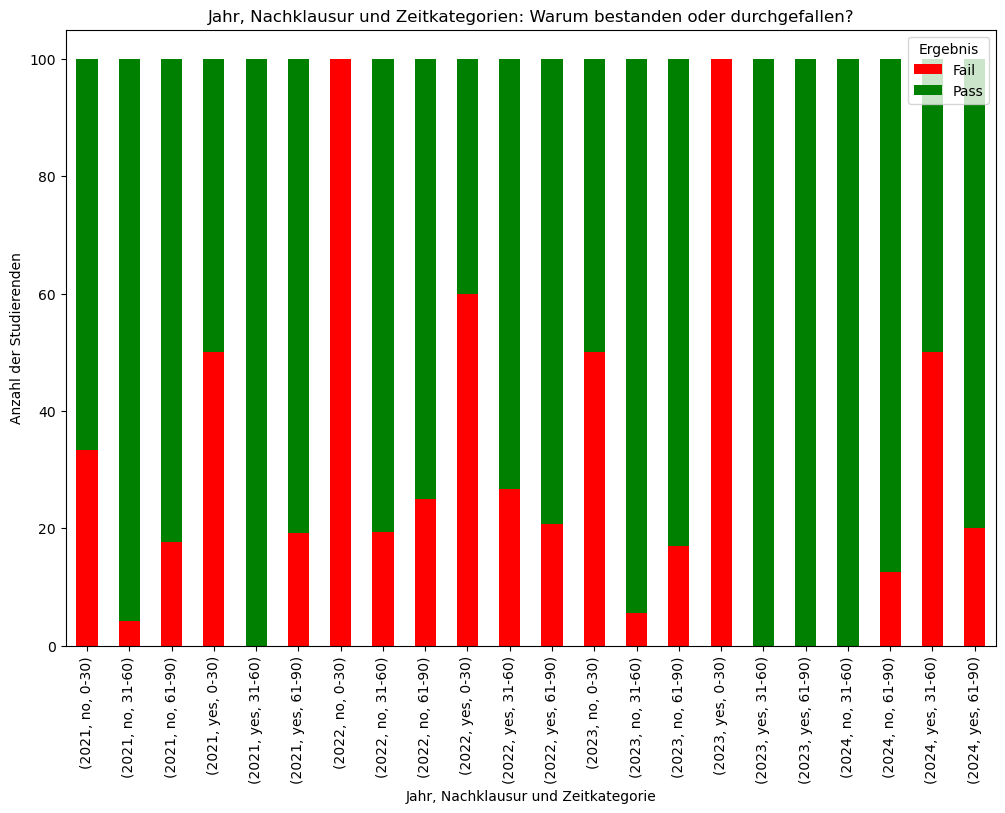

In [9]:
combined_counts = data.groupby(['Year', 'Nachklausur', 'Time Category', 'Exam Result']).size().unstack()
grouped_percent = combined_counts.div(combined_counts.sum(axis=1), axis=0) * 100

grouped_percent.plot(kind='bar', stacked=True, figsize=(12, 8), color=['red', 'green'])
plt.title('Jahr, Nachklausur und Zeitkategorien: Warum bestanden oder durchgefallen?')
plt.xlabel('Jahr, Nachklausur und Zeitkategorie')
plt.ylabel('Anzahl der Studierenden')
plt.legend(title='Ergebnis', labels=['Fail', 'Pass'])
plt.show()

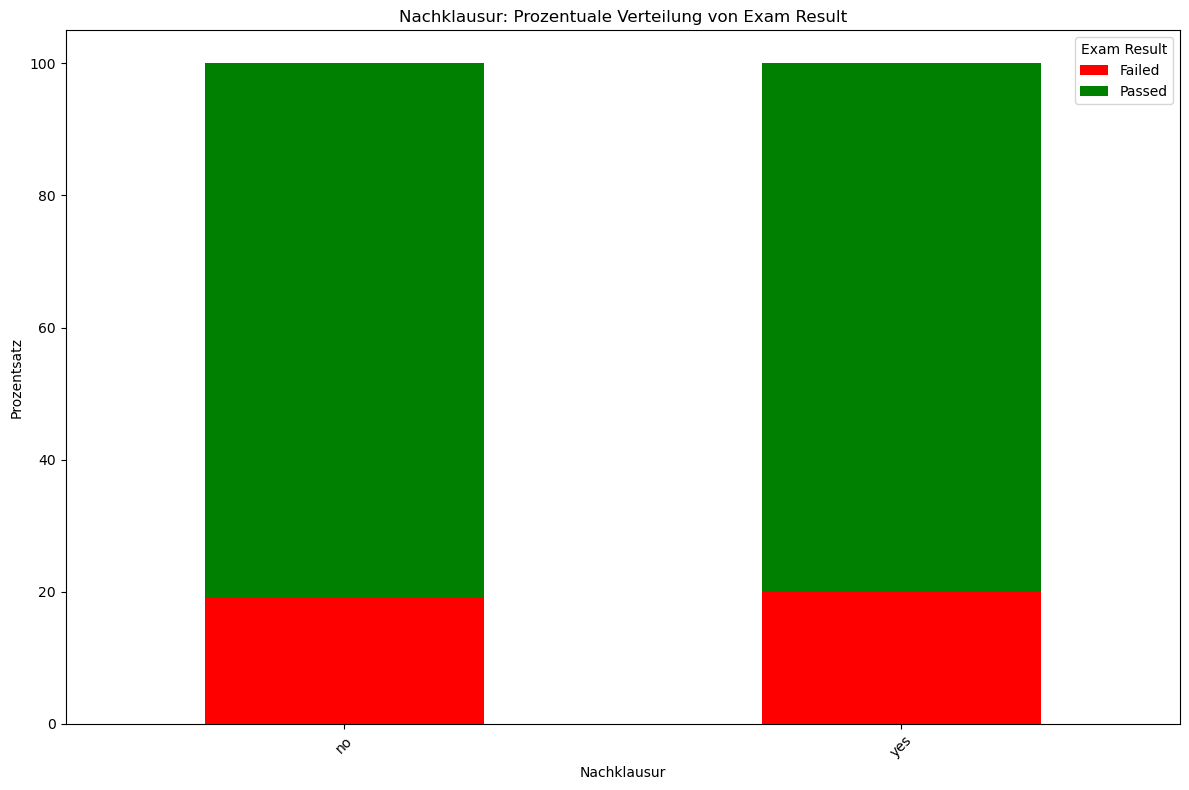

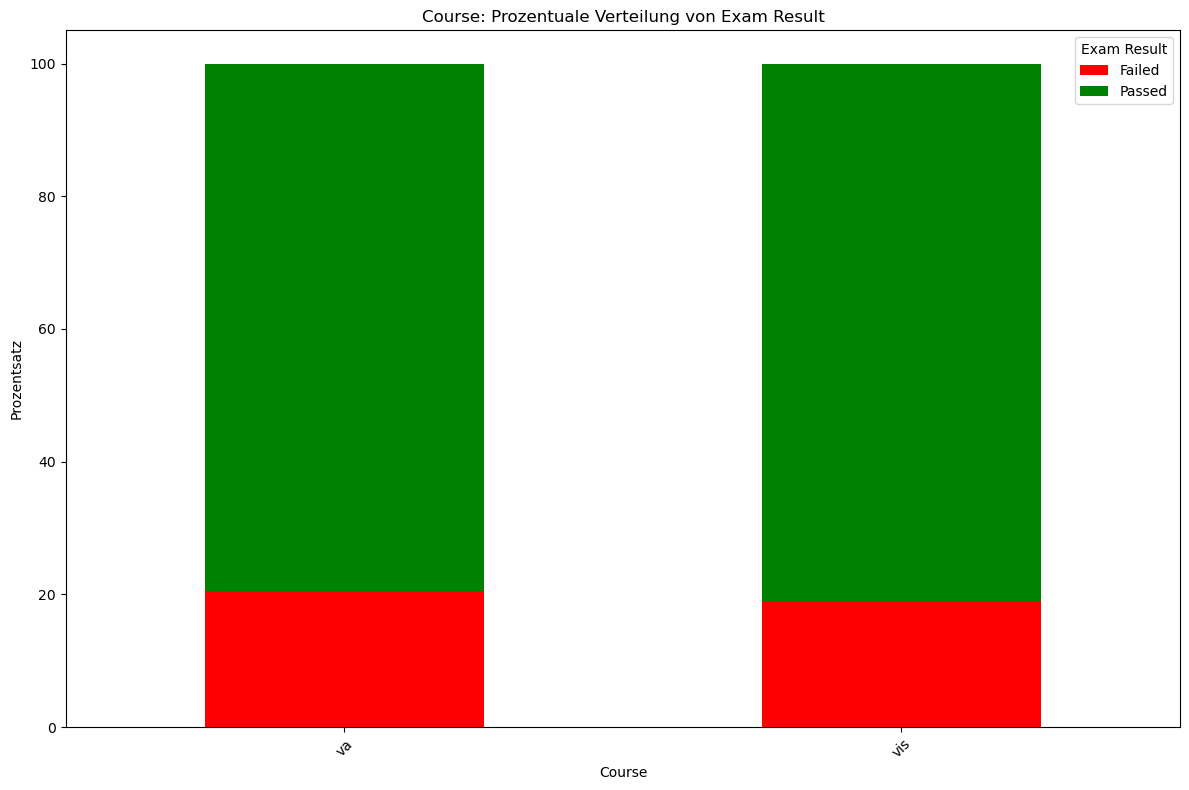

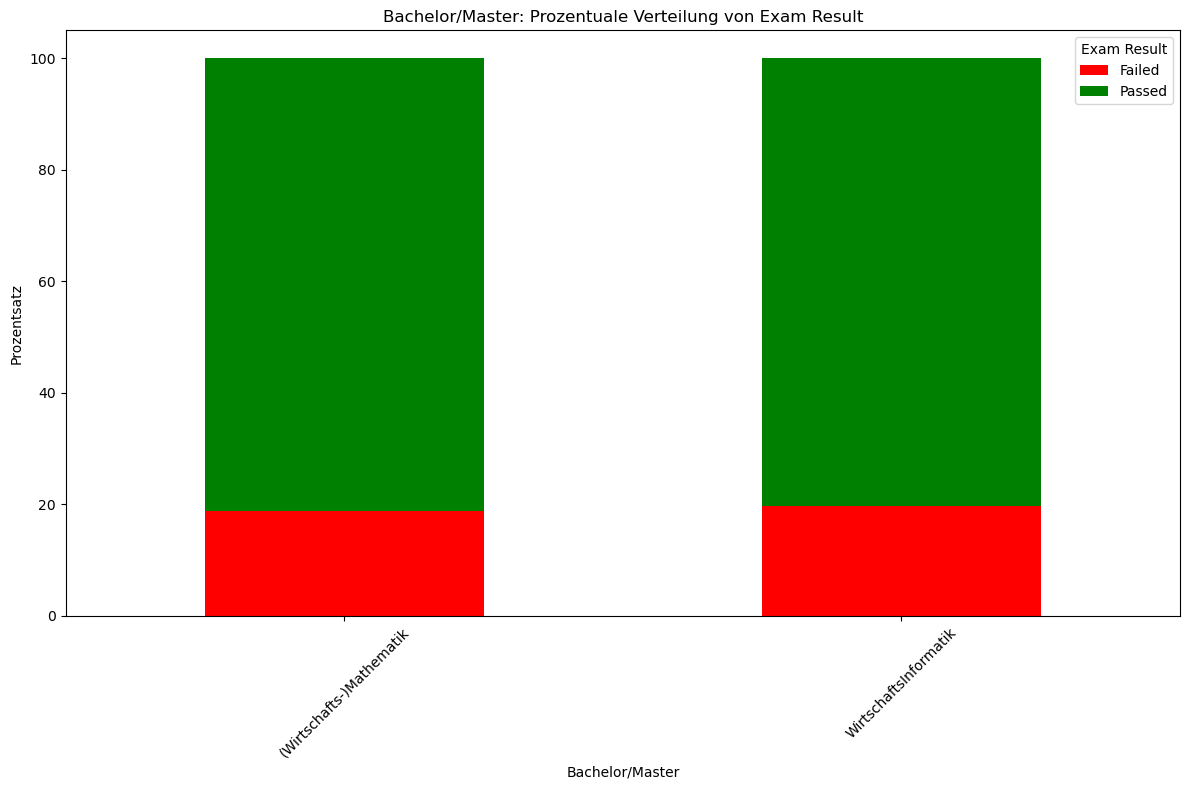

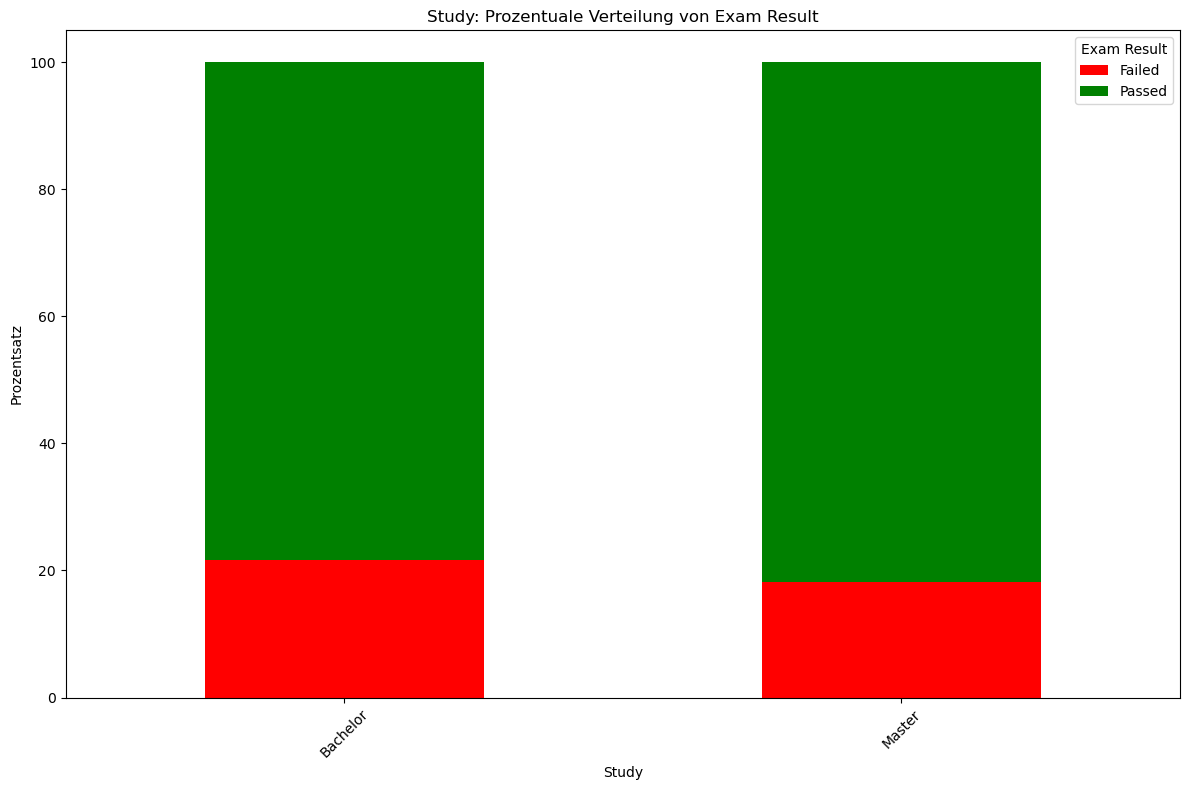

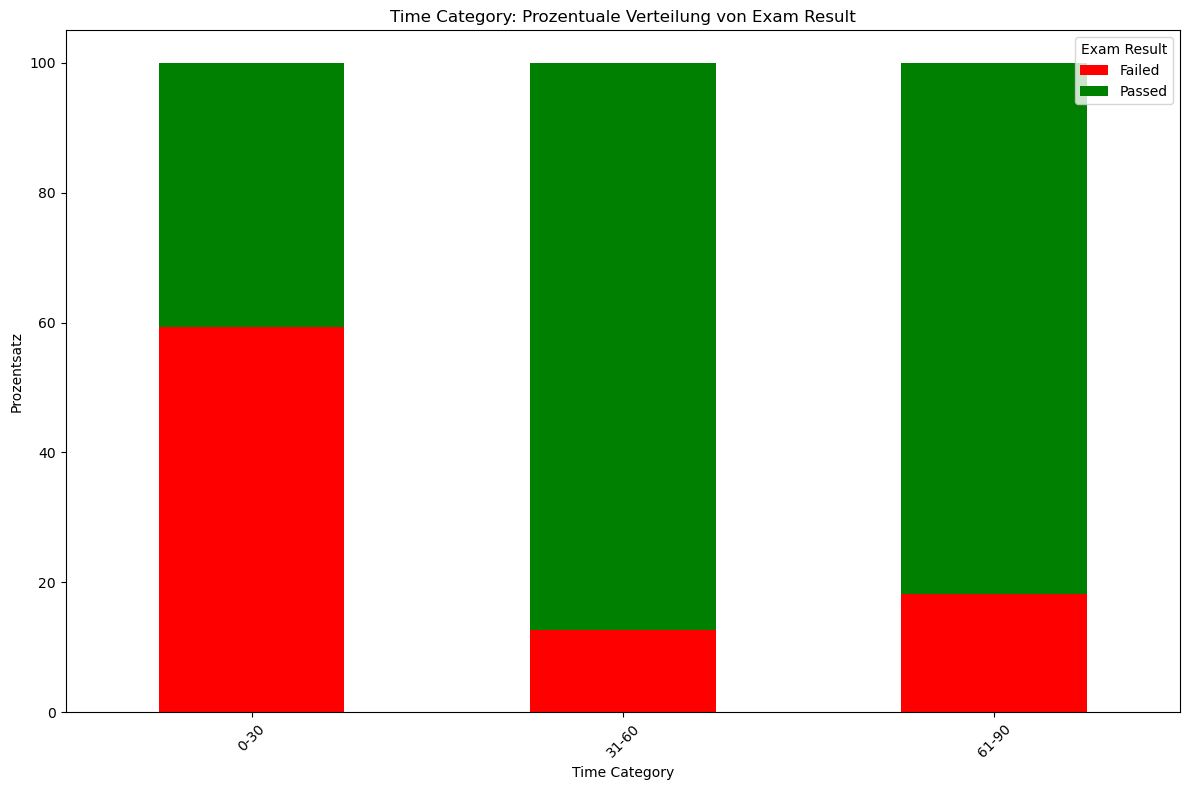

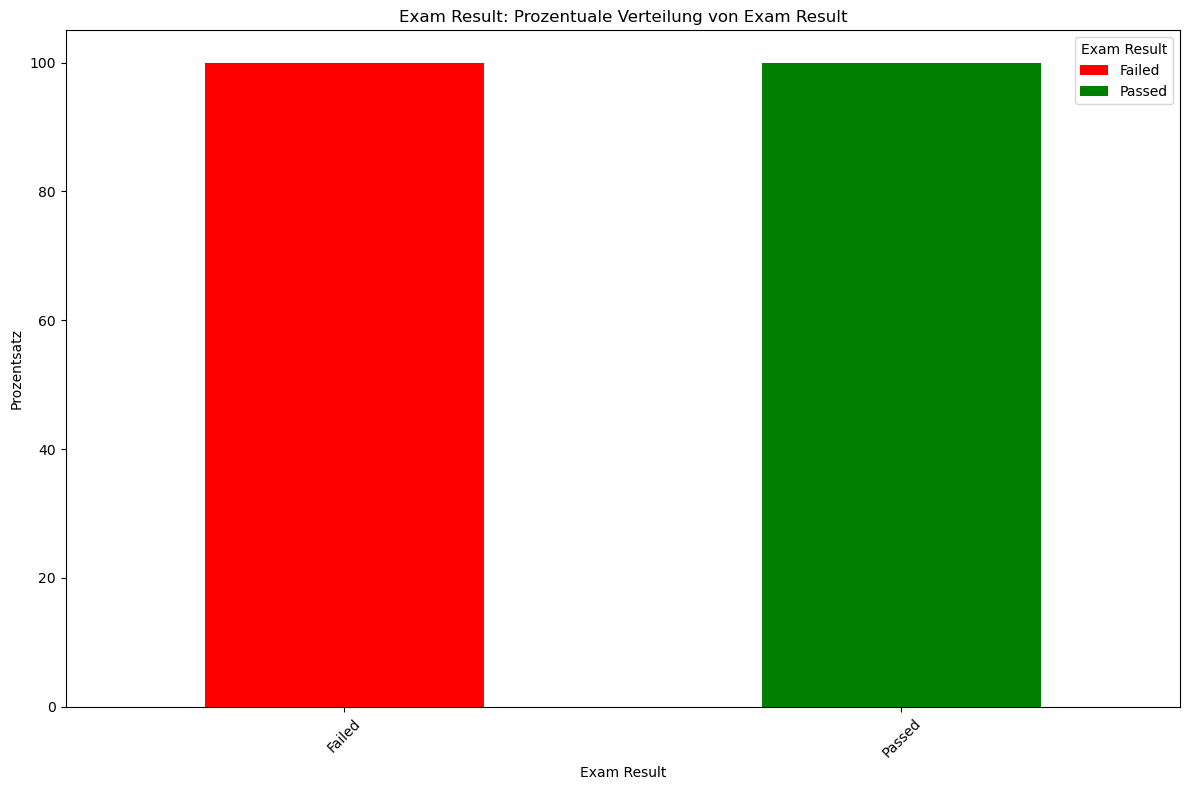

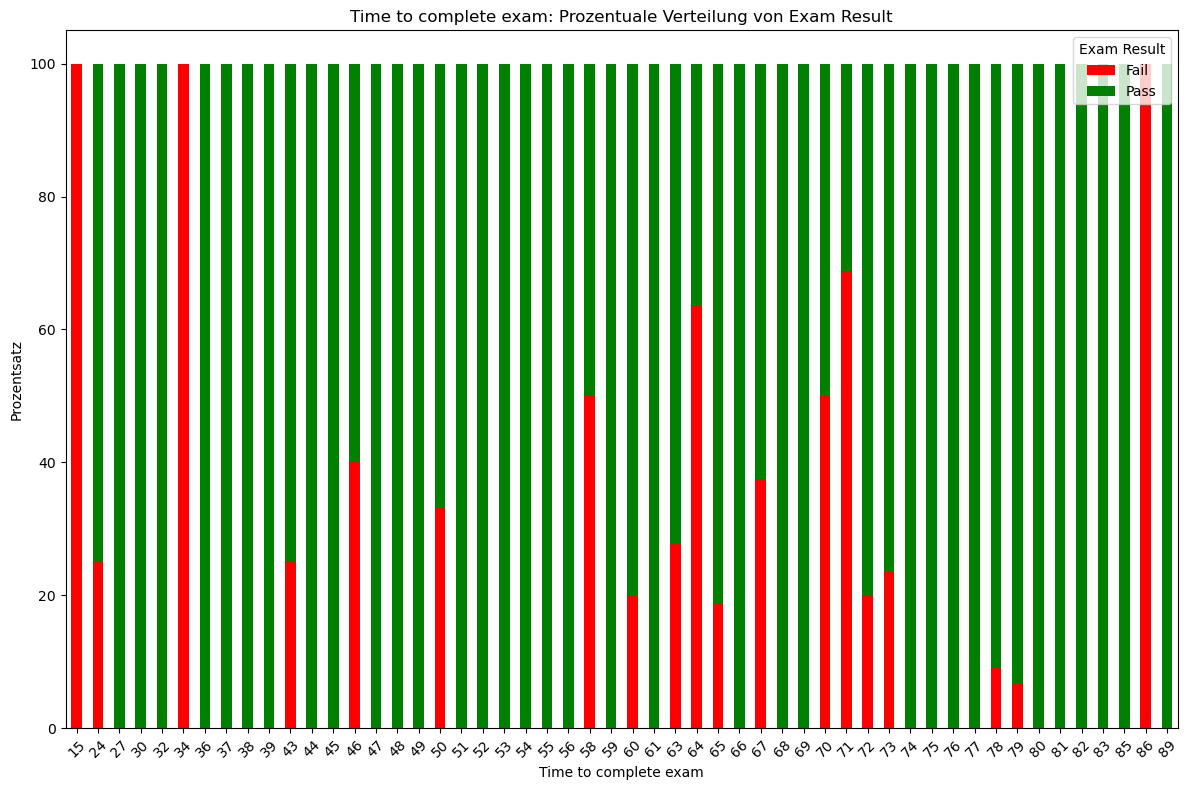

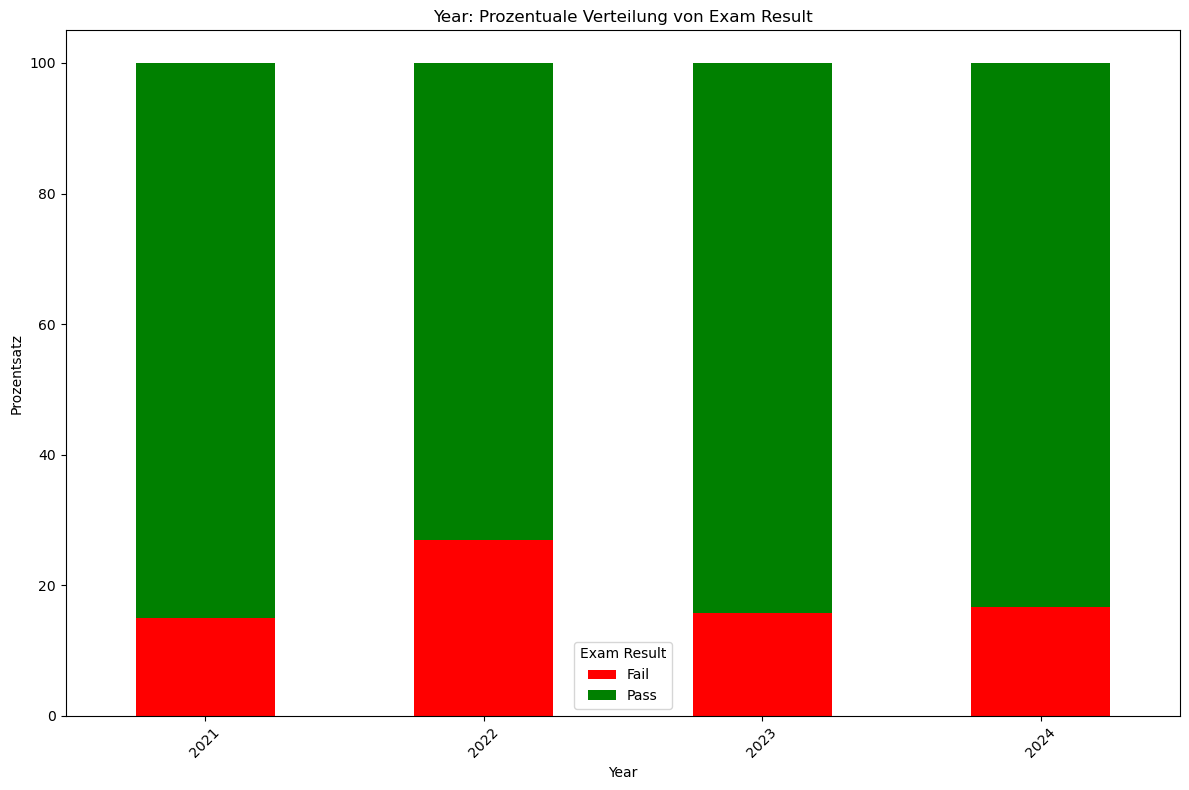

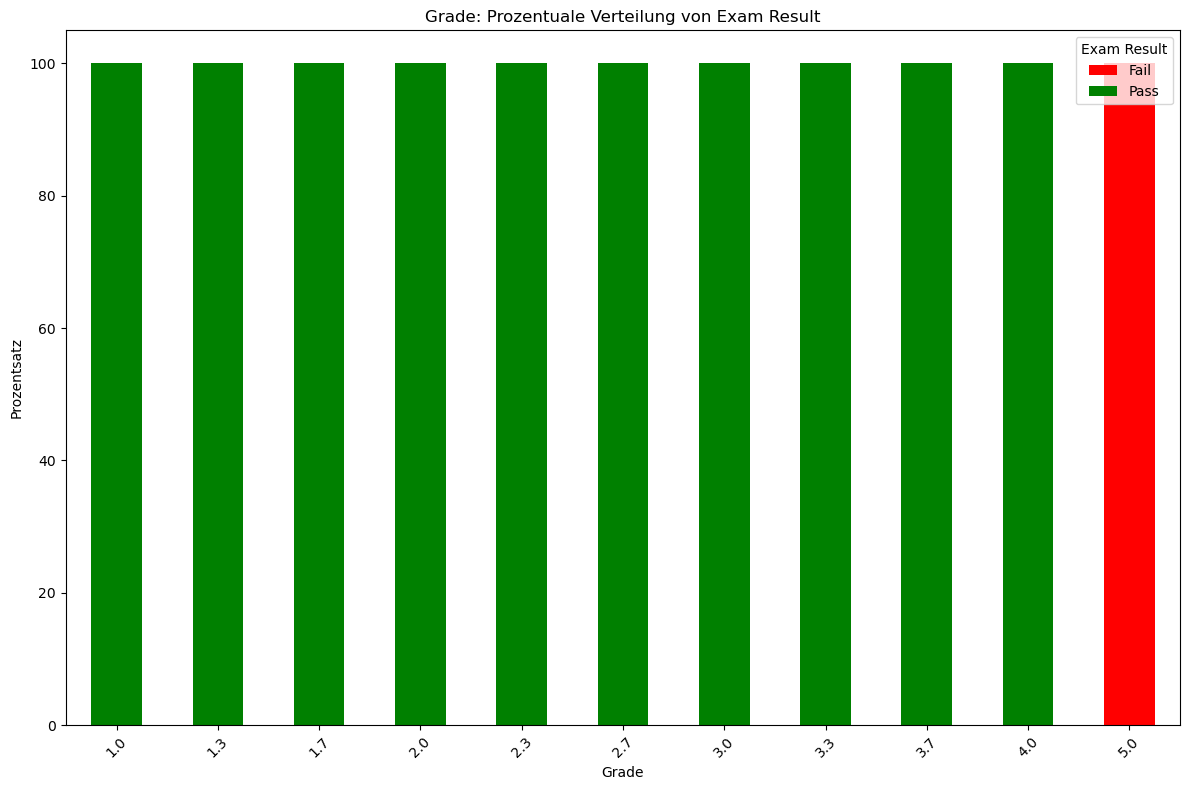

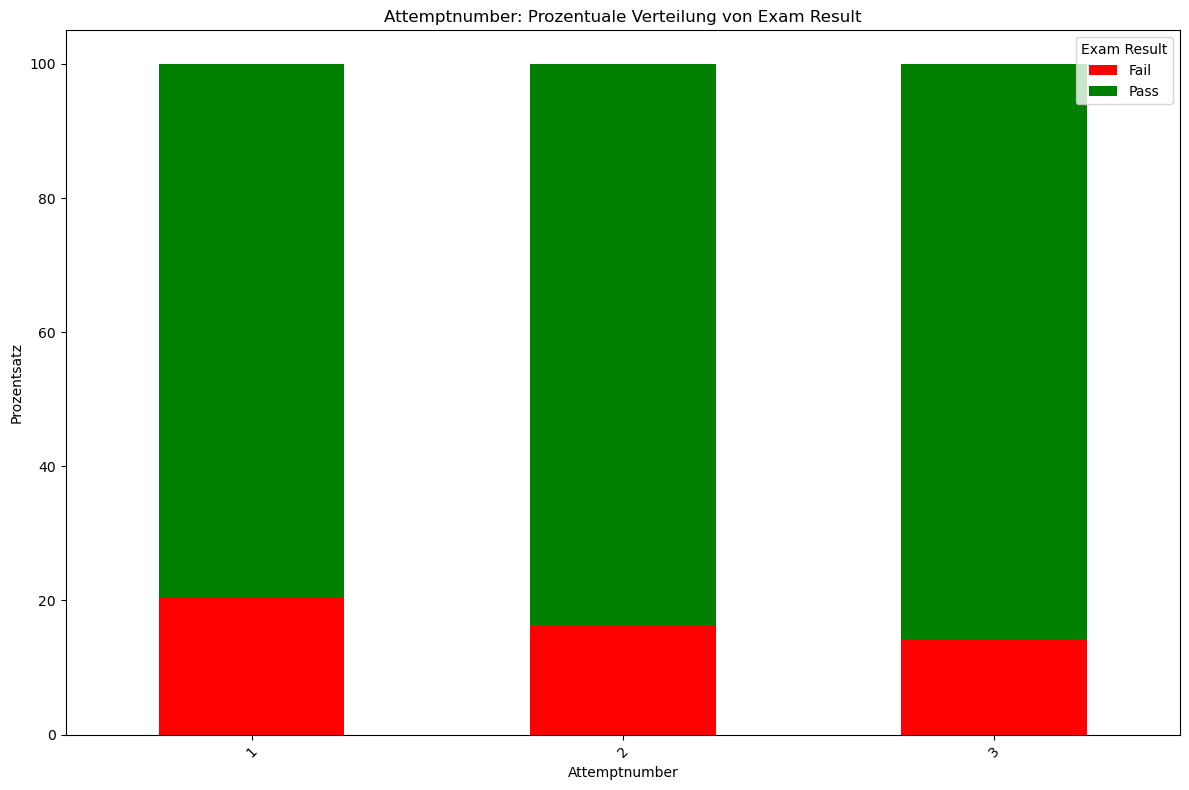

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_all_categories(data, result_column='Exam Result', figsize=(12, 8), colors=('red', 'green')):
    """
    Erstellt gestapelte Balkendiagramme in Prozentzahlen für alle kategorischen und numerischen Spalten.
    
    Parameters:
    - data: DataFrame, der analysiert wird.
    - result_column: str, die Spalte, die die Ergebnisse enthält (default: 'Exam Result').
    - figsize: tuple, die Größe des Diagramms (default: (12, 8)).
    - colors: tuple, Farben für Failed und Passed (default: ('red', 'green')).
    """
    categorical_cols = data.select_dtypes(include=['object']).columns
    numerical_cols = {
        'Time to complete exam': [15, 24, 27, 30, 32, 34, 36, 37, 38, 39, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 89],
        'Year': [2021, 2022, 2023, 2024],
        'Grade': [1.0, 1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0, 5.0],
        'Attemptnumber': [1, 2, 3]
    }

    for col in categorical_cols:
        grouped_data = data.groupby([col, result_column]).size().unstack()
        grouped_percent = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

        grouped_percent.plot(kind='bar', stacked=True, figsize=figsize, color=colors)
        plt.title(f'{col}: Prozentuale Verteilung von {result_column}')
        plt.xlabel(col)
        plt.ylabel('Prozentsatz')
        plt.legend(title=result_column, labels=['Failed', 'Passed'])
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    for col, values in numerical_cols.items():
        grouped_data = data[data[col].isin(values)].groupby([col, result_column]).size().unstack(fill_value=0)
        grouped_percent = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100
        ax = grouped_percent.plot(kind='bar', stacked=True, figsize=figsize, color=colors)
        plt.title(f'{col}: Prozentuale Verteilung von {result_column}')
        plt.xlabel(col)
        plt.ylabel('Prozentsatz')
        plt.legend(title=result_column, labels=['Fail', 'Pass'])
        plt.xticks(ticks=range(len(values)), labels=values, rotation=45)
        plt.tight_layout()
        plt.show()

plot_all_categories(data)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time to complete exam  386 non-null    int64  
 1   Year                   386 non-null    int64  
 2   Nachklausur            386 non-null    object 
 3   Grade                  386 non-null    float64
 4   Course                 386 non-null    object 
 5   Attemptnumber          386 non-null    int64  
 6   Bachelor/Master        386 non-null    object 
 7   Study                  386 non-null    object 
 8   Time Category          386 non-null    object 
 9   Exam Result            386 non-null    object 
 10  Result Numeric         386 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 33.3+ KB


## Attribute mit Einfluss auf das Bestehen der Klausuren
1. **Time to complete Exam**
2. **Nachklausur**
3. **Year**
### Mittlerer Einfluss
4. **Attemptnumber**
5. **Course**
6. **Bachelor/Master**
7. **Study**

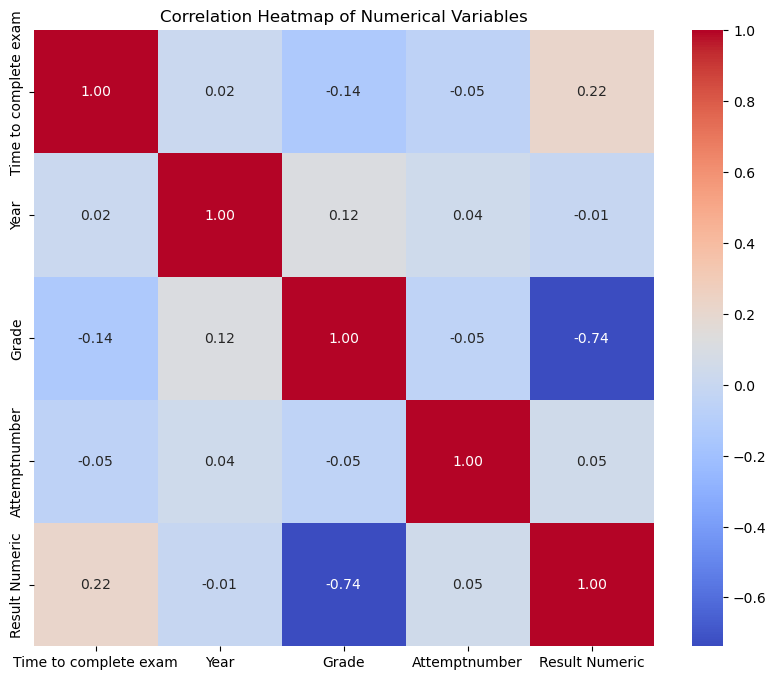

In [12]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [16]:
attributes = data[['Exam Result', 'Time Category', 'Year', 'Nachklausur', 'Attemptnumber', 'Study']]
attributes.to_csv('SelectedGradingData.csv', index=False)